In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("GDM_Python_Aug2025.xlsx")

In [3]:
print(df)


     Patient_ID  systolicBP_V1  diastolicBP_V1  PulseinV1  WeightinV1  \
0             1            114              58         73        59.4   
1             2            178              78         84        70.1   
2             3            123              62         79        64.9   
3             4            115              68         82        67.1   
4             5            116              61         92        67.5   
..          ...            ...             ...        ...         ...   
560         596            127              72         89        57.6   
561         597            138              63         98        94.5   
562         598            115              69         81        93.1   
563         599            129              69         84        78.4   
564         600            110              53         64        64.2   

     Height_cms    BMIinV1 Smoking 123 Ethnicity  PreviousGDM10 V1  ...  \
0         169.6  20.650699          NR     White

In [4]:
df.columns


Index(['Patient_ID', 'systolicBP_V1', 'diastolicBP_V1', 'PulseinV1',
       'WeightinV1', 'Height_cms', 'BMIinV1', 'Smoking 123', 'Ethnicity',
       'PreviousGDM10 V1', 'Chronic Illness', 'Medications_All', 'Age_gt_30',
       'HighRisk', 'Screening method', '1st DASS score >33',
       'Gestational Age_V1', 'EDD V1', 'White Cell Count', 'Platelet_V1',
       'Calcium_V1', 'Albumin_V1', 'U Albumin_V1', 'U Protein_V1', 'V1 US EDD',
       'EDDEqLMP', 'EDDMethod', '25OHD value (nmol/L)_V1', 'Caltrate',
       'Glucose_1h', 'OGTT_0h_value', 'OGTT_1h_value', 'OGTT_2h_value',
       'Miscarriage after 28/40 10', 'Withdrew after 28/40 10',
       'Delivered before 36/40', 'Attended Visit 3', 'Date of Visit 3',
       'HB1AC_V2', 'WeightinV3', 'systolicBP_V3', 'diastolicBP_V3',
       'PulseinV3', '3rd visit DASS >33', 'White Cell Count_V3', 'Platelet_V3',
       'Calcium_V3', 'ALT_V3', 'U Albumin_V3', 'U Protein_V3',
       '25OHD value_V3', 'Abdominal Circumference_V3', 'HBA1C_V1', 'HBA1C_

In [5]:
print(df['BMIinV1'].describe())

count    565.000000
mean      26.877682
std        5.833733
min       16.550752
25%       22.584613
50%       25.813507
75%       29.902244
max       56.929525
Name: BMIinV1, dtype: float64


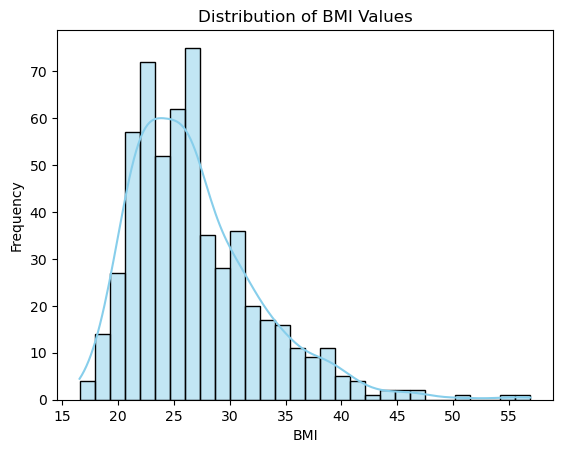

In [6]:


sns.histplot(df['BMIinV1'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of BMI Values')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


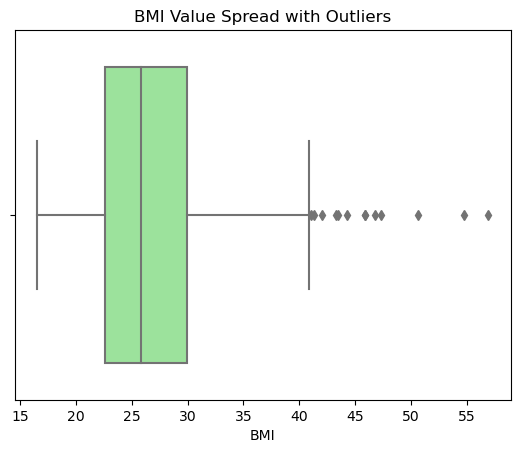

In [7]:
sns.boxplot(x=df['BMIinV1'].dropna(), color='lightgreen')
plt.title('BMI Value Spread with Outliers')
plt.xlabel('BMI')
plt.show()


C:\Users\garin\AppData\Local\Temp\ipykernel_49940\552834175.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['BMIinV1', 'Age_gt_30', 'systolicBP_V1', 'Glucose_1h']].corr()


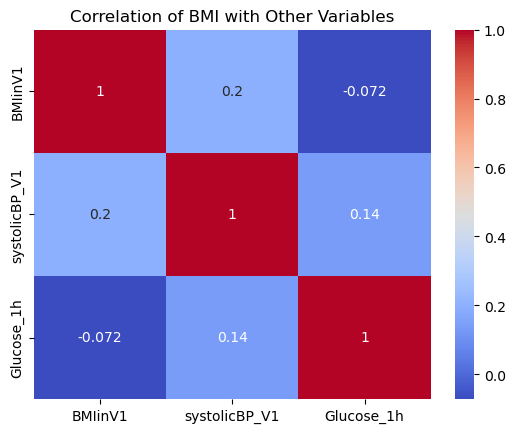

In [8]:
correlation_matrix = df[['BMIinV1', 'Age_gt_30', 'systolicBP_V1', 'Glucose_1h']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation of BMI with Other Variables')
plt.show()


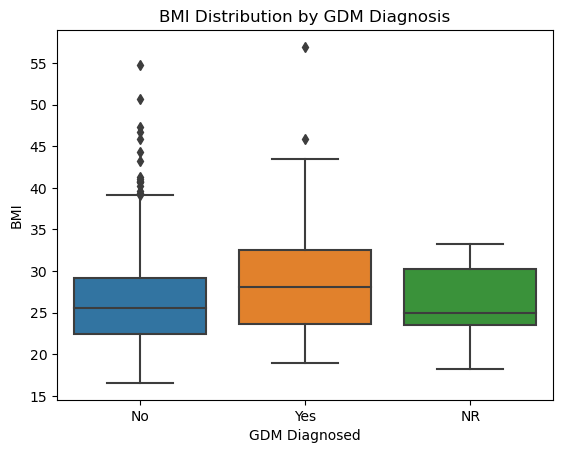

In [9]:
sns.boxplot(x='GDM Diagonised', y='BMIinV1', data=df)
plt.title('BMI Distribution by GDM Diagnosis')
plt.xlabel('GDM Diagnosed')
plt.ylabel('BMI')
plt.show()


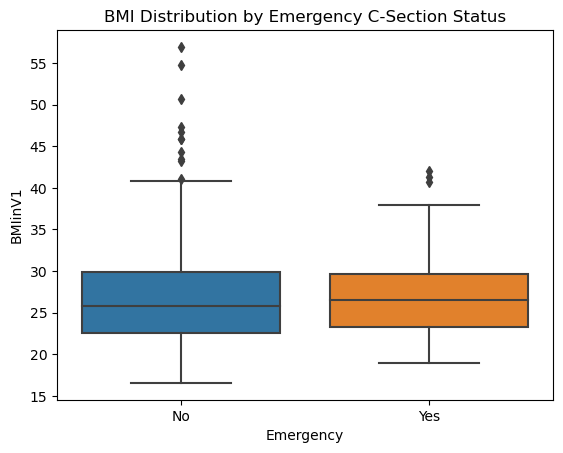

In [10]:
sns.boxplot(x='Emergency', y='BMIinV1', data=df)
plt.title('BMI Distribution by Emergency C-Section Status')
plt.show()




In [11]:
high_bmi = df['BMIinV1'] >= 30


In [16]:
gdm_positive = df[df['GDM Diagonised'] == 'Yes']
gdm_negative = df[df['GDM Diagonised'] == 'No']
high_bmi_subset = df[high_bmi]


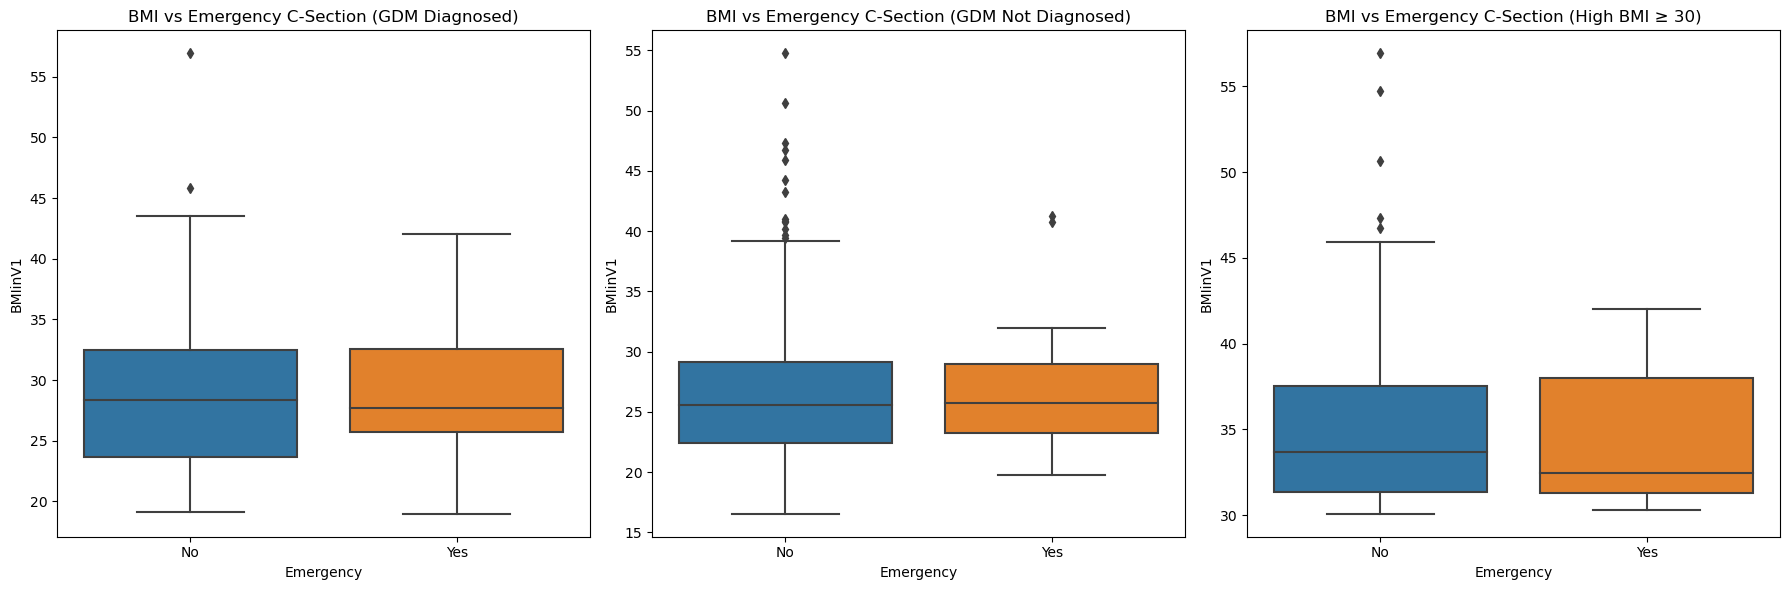

In [17]:


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for GDM Diagnosed
sns.boxplot(x='Emergency', y='BMIinV1', data=gdm_positive, ax=axes[0])
axes[0].set_title('BMI vs Emergency C-Section (GDM Diagnosed)')

# Plot for Non-GDM
sns.boxplot(x='Emergency', y='BMIinV1', data=gdm_negative, ax=axes[1])
axes[1].set_title('BMI vs Emergency C-Section (GDM Not Diagnosed)')

# Plot for High BMI group
sns.boxplot(x='Emergency', y='BMIinV1', data=high_bmi_subset, ax=axes[2])
axes[2].set_title('BMI vs Emergency C-Section (High BMI ≥ 30)')

plt.tight_layout()
plt.show()


In [14]:
print(df['GDM Diagonised'].unique())


['No' 'Yes' 'NR']


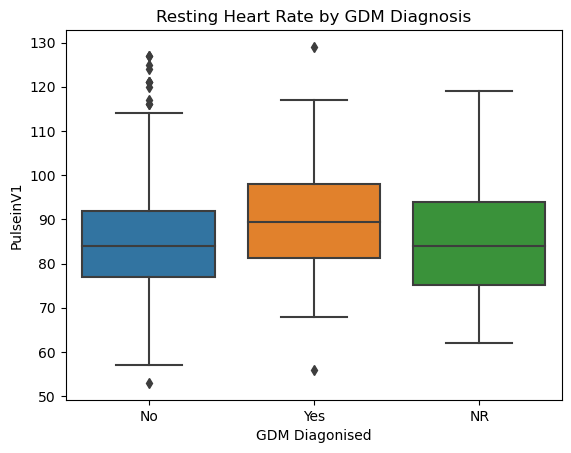

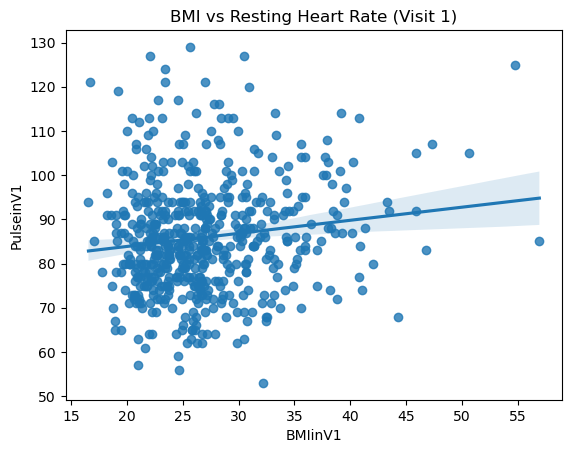

In [19]:
sns.boxplot(x='GDM Diagonised', y='PulseinV1', data=df)
plt.title('Resting Heart Rate by GDM Diagnosis')
plt.show()

sns.regplot(x='BMIinV1', y='PulseinV1', data=df)
plt.title('BMI vs Resting Heart Rate (Visit 1)')
plt.show()


In [20]:
overall = df['BirthWeight'].mean()
gdm = df[df['GDM Diagonised'] == 'Yes']['BirthWeight'].mean()
no_gdm = df[df['GDM Diagonised'] == 'No']['BirthWeight'].mean()

print(f"Average BirthWeight overall: {overall:.2f}")
print(f"With GDM: {gdm:.2f}")
print(f"Without GDM: {no_gdm:.2f}")

Average BirthWeight overall: 3.53
With GDM: 3.42
Without GDM: 3.54


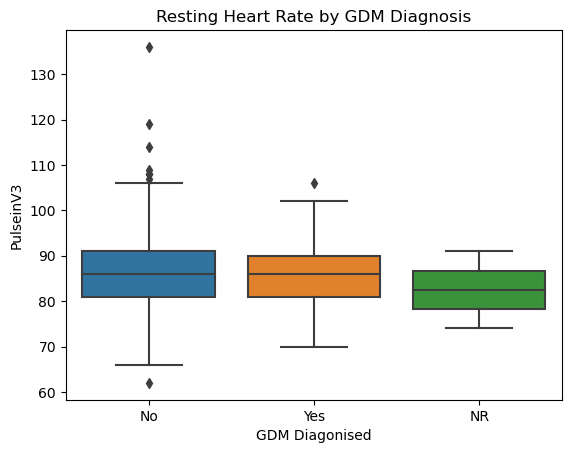

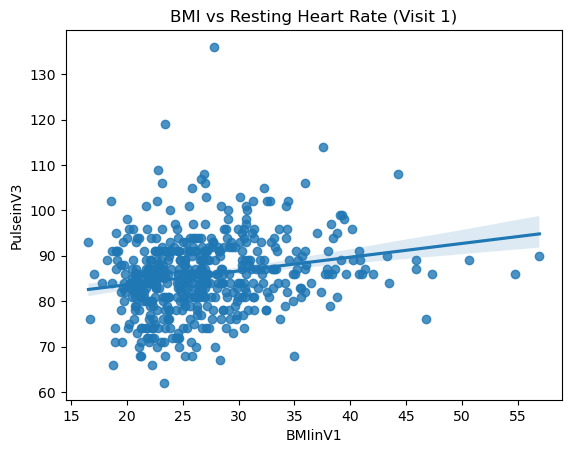

In [21]:
sns.boxplot(x='GDM Diagonised', y='PulseinV3', data=df)
plt.title('Resting Heart Rate by GDM Diagnosis')
plt.show()

sns.regplot(x='BMIinV1', y='PulseinV3', data=df)
plt.title('BMI vs Resting Heart Rate (Visit 1)')
plt.show()